# **Lesson 06**

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os

In [97]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params
%matplotlib inline

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

# Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

## Solution

This exercise performs a Ising 1D simulation in the canonical ensemble $(NVT)$, with fixed number of particles, volume and temperature. This means that the system is in contact with a heat bath and is able to exchange energy with it to maintain constant temperature. The probability associated to every microstate is given bu Boltzmann distribution, with the Boltzmann weights: $\exp(-\beta E)$.

From now on, every quantity is reported using reduced units, but I omit the $^*$ symbols.

### Metropolis sampling
Here we use again the $M(RT)^2$ algorithm to perform a simulation step, i.e. to propose the spin flipping to every particle: the only peculiarity is the fact that acceptance probability for each step is computed using the energy difference $\Delta E$ between the flipped and un-flipped state. So we have:

$$ A(x_{i+1}|x_i) = \min \left[ 1 \, , \exp(\beta \Delta E)  \right] \ , $$

where $\Delta E$ is computed considering only the nearest neighbors.

### Gibbs sampling
The main characteristic of **Gibbs algorithm** is that the proposed move is always accepted: this means that every particle spin is set to $+1$ or $-1$ independently of its previous value, but considering the energy difference between the state where the spin would have been set to $+1$ and the state with $-1$.

The probability used to set the spin value for particle $i$ is given by:

$$ p(s_i = \pm 1) = \frac{1}{1 + \exp(-\beta \Delta E)} \ , $$

where again $\Delta E$ is computed considering only the nearest neighbors.

### Code
In this exercise I added Gibbs sampling to the provided simulator, here I show the code:
```c++
void System :: move(int i){ // Propose a MC move for particle i
  if(_sim_type == 3){ //Gibbs sampler for Ising
    double delta_E = 2.0 * ( _J * (_particle(this->pbc(i-1)).getspin() + _particle(this->pbc(i+1)).getspin()) + _H);
    double acceptance = 1.0 / (1.0 + exp(-_beta*delta_E));
    if(_rnd.Rannyu() < acceptance) _particle(i).setspin(1);
    else _particle(i).setspin(-1);
    _naccepted++;
  }
/* ... */
}
```
Below I report the code I added to measure all the physical quantities measured in this exercise.

**Heat capacity**:
```c++
void System :: measure(){ // Measure properties
/* ... */
  // SPECIFIC HEAT /////////////////////////////////////////////////////////////
  if (_measure_cv) _measurement(_index_cv) = pow(tenergy_temp, 2);
/* ... */
}

void System :: averages(int blk, const string path){
/* ... */
  if (_measure_cv) _average(_index_cv) = _beta * _beta * (_average(_index_cv) - pow(_average(_index_tenergy), 2)) * double(_npart); // Measuring specific heat
/* ... */
}
```

**Magnetization**
```c++
void System :: measure(){ // Measure properties
/* ... */
  // MAGNETIZATION /////////////////////////////////////////////////////////////
  if (_measure_magnet or _measure_chi){
    for (int i=0; i<_npart; i++) magnetization += double(_particle(i).getspin());
    magnetization /= double(_npart);
    if (_measure_magnet) _measurement(_index_magnet) = magnetization;
  }
/* ... */
}
```

**Magnetic susceptibility**
```c++
void System :: measure(){ // Measure properties
/* ... */
  // SUSCEPTIBILITY ////////////////////////////////////////////////////////////
  if (_measure_chi) _measurement(_index_chi) = _beta * pow(magnetization, 2) * double(_npart);
/* ... */
}
```

### Equilibration

to perform the equilibration of the system I just added two for loops in the `equilibration()` method, that let the system evolve towards its equilibrium configuration. I used the same number of steps and blocks given in the `input.dat` file.

Below there is the code:
```c++
if(!_measure_tenergy) {
  cerr << "PROBLEM: equilibration needs to measure the internal energy!" << endl;
  exit(EXIT_FAILURE);
}

for(int i=0; i<_nblocks; i++) {
    for(int j=0; j<_nsteps; j++) {
        Progress_Bar(i*_nsteps + j, _nblocks*_nsteps -1);
        this->step();
        this->measure();
    }
  this->averages(i+1, path);  
  this->block_reset(i+1, path);
}
```

Below I show plots of equilibrations of the system with both Metropolis and Gibbs samplings, and using three different values of temperature $(0.2, \ 1.6, \ 3)$ to be sure that the equilibration performance does not depend on the initial temperature.

In [98]:
U_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
U_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
U_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

C_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
C_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
C_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

X_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
X_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
X_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

M_metro_02 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=0.200.csv', delimiter=',', skiprows=1)
M_metro_16 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=1.600.csv', delimiter=',', skiprows=1)
M_metro_30 = np.loadtxt('06.1/Metropolis/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=3.000.csv', delimiter=',', skiprows=1)


U_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
U_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
U_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/total_energy_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

C_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
C_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
C_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/specific_heat_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

X_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=0.200.csv', delimiter=',', skiprows=1)
X_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=1.600.csv', delimiter=',', skiprows=1)
X_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/susceptibility_H=0.00_t=3.000.csv', delimiter=',', skiprows=1)

M_gibbs_02 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=0.200.csv', delimiter=',', skiprows=1)
M_gibbs_16 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=1.600.csv', delimiter=',', skiprows=1)
M_gibbs_30 = np.loadtxt('06.1/Gibbs/OUTPUT/EQUILIBRATION/magnetization_H=0.02_t=3.000.csv', delimiter=',', skiprows=1)

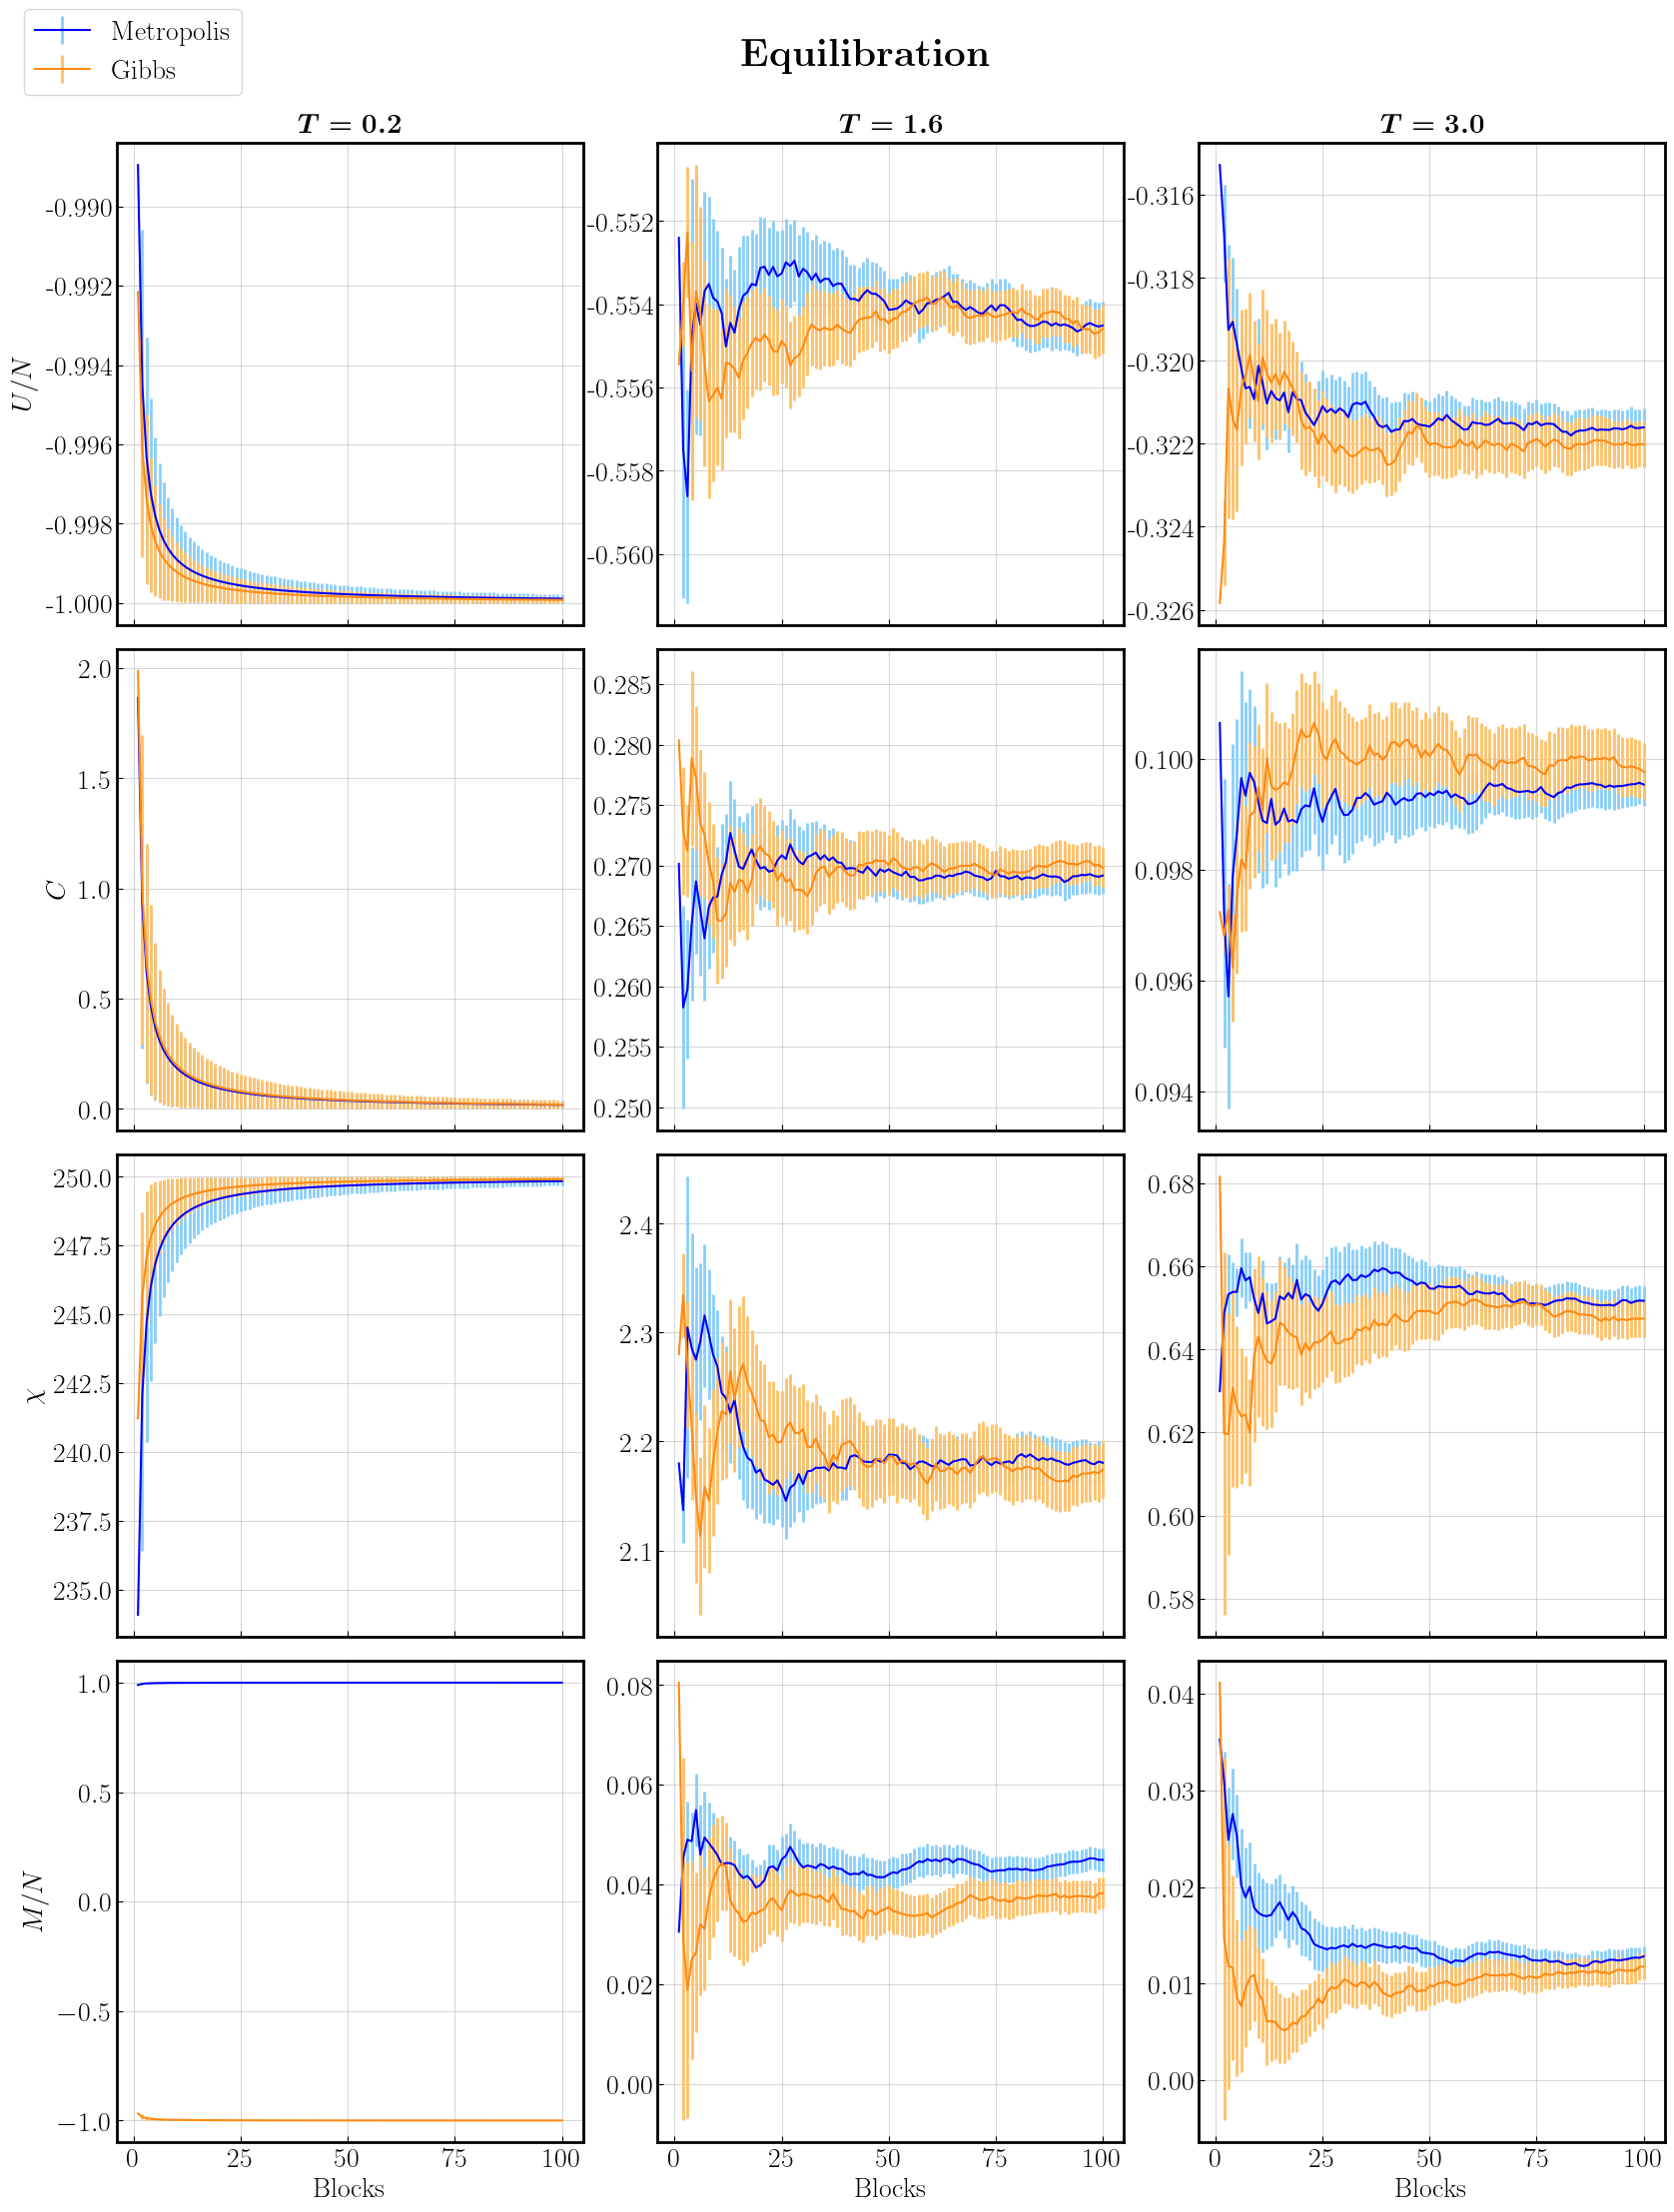

In [106]:
fig, axs = plt.subplots(4, 3, figsize=(20,26), gridspec_kw={'hspace': 0.05, 'wspace': 0.16})
fig.suptitle(r'\textbf{Equilibration}', fontsize=28, y=0.92)


axs[0,0].set_title(r'\boldmath $T=0.2$', pad=8)
axs[0,1].set_title(r'\boldmath $T=1.6$', pad=8)
axs[0,2].set_title(r'\boldmath $T=3.0$', pad=8)


axs[0,0].errorbar(U_metro_02[:,0], U_metro_02[:,2], yerr=U_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[0,0].errorbar(U_gibbs_02[:,0], U_gibbs_02[:,2], yerr=U_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[0,1].errorbar(U_metro_16[:,0], U_metro_16[:,2], yerr=U_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[0,1].errorbar(U_gibbs_16[:,0], U_gibbs_16[:,2], yerr=U_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[0,2].errorbar(U_metro_30[:,0], U_metro_30[:,2], yerr=U_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[0,2].errorbar(U_gibbs_30[:,0], U_gibbs_30[:,2], yerr=U_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[0,0].set_ylabel('$U/N$', labelpad=6)


axs[1,0].errorbar(C_metro_02[:,0], C_metro_02[:,2], yerr=C_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[1,0].errorbar(C_gibbs_02[:,0], C_gibbs_02[:,2], yerr=C_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[1,1].errorbar(C_metro_16[:,0], C_metro_16[:,2], yerr=C_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[1,1].errorbar(C_gibbs_16[:,0], C_gibbs_16[:,2], yerr=C_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[1,2].errorbar(C_metro_30[:,0], C_metro_30[:,2], yerr=C_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[1,2].errorbar(C_gibbs_30[:,0], C_gibbs_30[:,2], yerr=C_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[1,0].set_ylabel('$C$', labelpad=6)


axs[2,0].errorbar(X_metro_02[:,0], X_metro_02[:,2], yerr=X_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[2,0].errorbar(X_gibbs_02[:,0], X_gibbs_02[:,2], yerr=X_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[2,1].errorbar(X_metro_16[:,0], X_metro_16[:,2], yerr=X_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[2,1].errorbar(X_gibbs_16[:,0], X_gibbs_16[:,2], yerr=X_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[2,2].errorbar(X_metro_30[:,0], X_metro_30[:,2], yerr=X_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[2,2].errorbar(X_gibbs_30[:,0], X_gibbs_30[:,2], yerr=X_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[2,0].set_ylabel('$\chi$', labelpad=6)


axs[3,0].errorbar(M_metro_02[:,0], M_metro_02[:,2], yerr=M_metro_02[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[3,0].errorbar(M_gibbs_02[:,0], M_gibbs_02[:,2], yerr=M_gibbs_02[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[3,1].errorbar(M_metro_16[:,0], M_metro_16[:,2], yerr=M_metro_16[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[3,1].errorbar(M_gibbs_16[:,0], M_gibbs_16[:,2], yerr=M_gibbs_16[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')
axs[3,2].errorbar(M_metro_30[:,0], M_metro_30[:,2], yerr=M_metro_30[:,3], color='blue', ecolor='lightskyblue', elinewidth=2, label='Metropolis')
axs[3,2].errorbar(M_gibbs_30[:,0], M_gibbs_30[:,2], yerr=M_gibbs_30[:,3], color='#FF8A13', ecolor='#FFC067', elinewidth=2, label='Gibbs')

axs[3,0].set_ylabel('$M/N$', labelpad=6)


axs[-1,0].set_xlabel('Blocks')
axs[-1,1].set_xlabel('Blocks')
axs[-1,2].set_xlabel('Blocks')

for i in range(3) :
    for j in range(3) :
        axs[j,i].set_xticklabels([])

axs[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[0,2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))


axs[0,0].legend(loc=(-0.2,1.1))

plt.show()

We can note that, after approximately $100$ blocks the system has reached its equilibrium state and that both sampling methods leads to the same equilibrium values. The only exception is magnetization per particle at the temperature $T=0.2$, probably because the given temperature is too low and the spins have too little probability to flip, and so they seem to be freezed at input value.

**Plot parameters**:
- Total steps: $10^5$
- Blocks: $100$
- Steps in each block: $10^3$

## Simulations

In [100]:
data_H0_metro = np.loadtxt('06.1/Metropolis/OUTPUT/summary_H=0.00.csv', delimiter=',', skiprows=1)
data_H2_metro = np.loadtxt('06.1/Metropolis/OUTPUT/summary_H=0.02.csv', delimiter=',', skiprows=1)
data_H0_gibbs = np.loadtxt('06.1/Gibbs/OUTPUT/summary_H=0.00.csv', delimiter=',', skiprows=1)
data_H2_gibbs = np.loadtxt('06.1/Gibbs/OUTPUT/summary_H=0.02.csv', delimiter=',', skiprows=1)

In [101]:
# computing theorical values
T = data_H0_metro[:,0]
beta = 1/T
J = 1.0
N = 50
th = np.tanh(J/T)
thN= th**N
ch = 1/th
h=0.02 #external field

### Internal energy

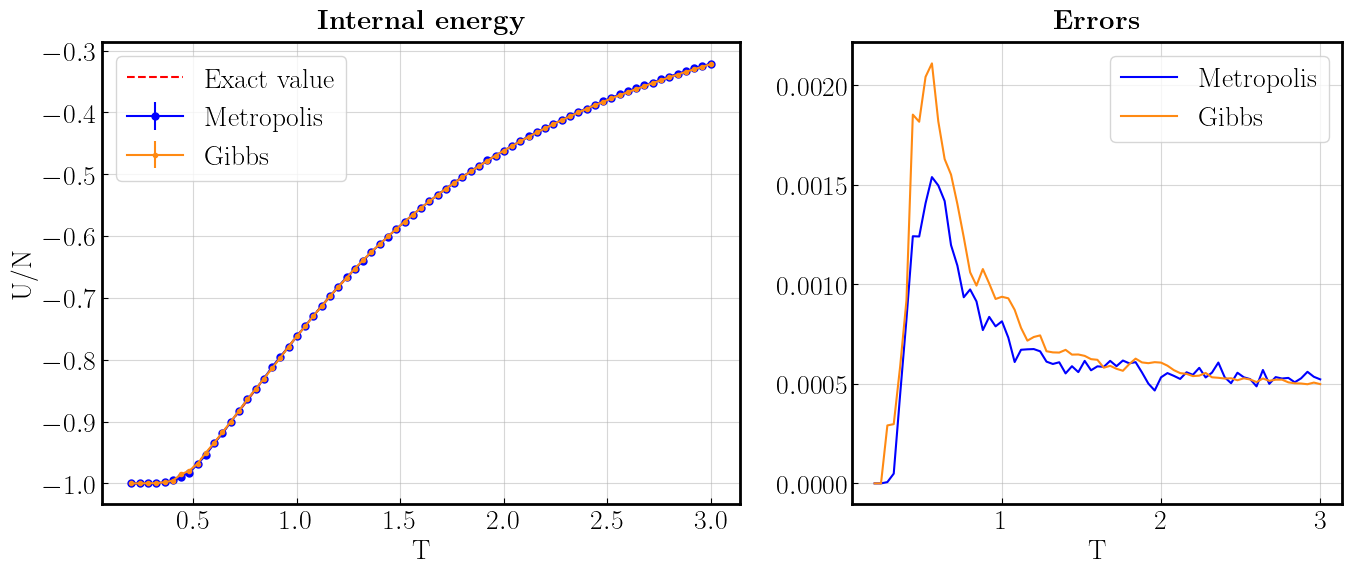

In [102]:
U = -J*( th + ch*thN )/( 1 + thN )

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H0_metro[:,1], yerr=data_H0_metro[:,2], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H0_gibbs[:,1], yerr=data_H0_gibbs[:,2], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, U, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Internal energy}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('U/N')
axs[0].legend()

axs[1].plot(T, data_H0_metro[:,2], color='blue', label='Metropolis')
axs[1].plot(T, data_H0_gibbs[:,2], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

**Plot parameters**:
- Total steps: $10^5$
- Blocks: $100$
- Steps in each block: $10^3$

### Heat capacity

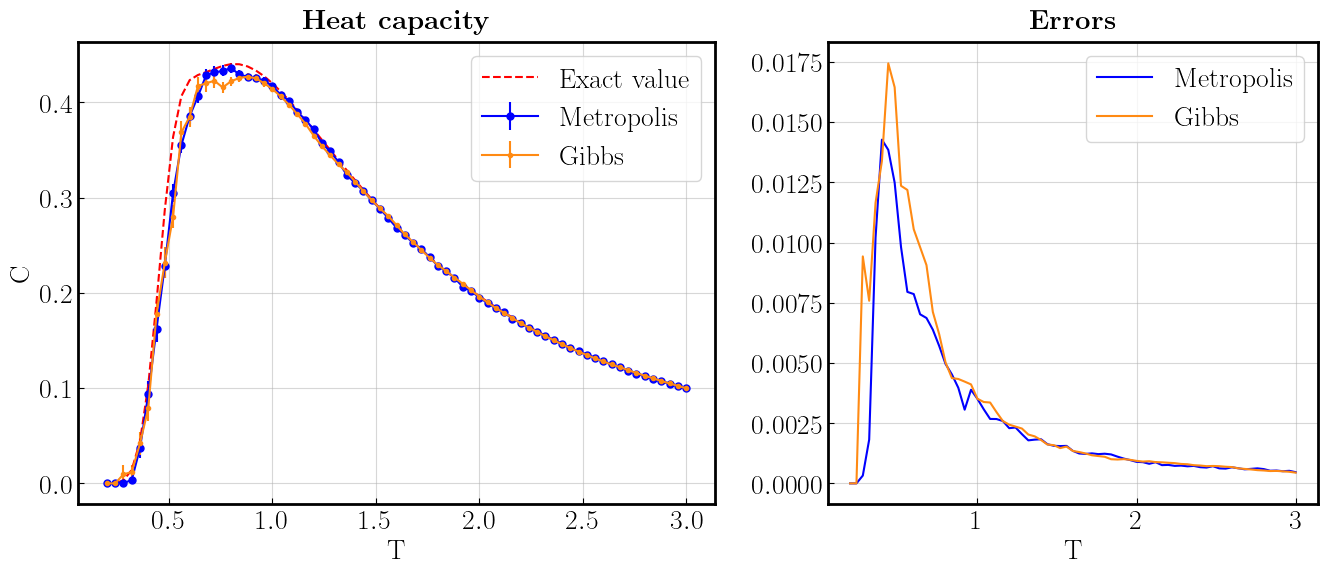

In [103]:
CV = ((beta*J)**2)*(((1+thN+(N-1)*(th**2)+(N-1)*(ch**2)*thN)/(1+thN))-N*((th+ch*thN)/(1+thN))**2)

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H0_metro[:,3], yerr=data_H0_metro[:,4], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H0_gibbs[:,3], yerr=data_H0_gibbs[:,4], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, CV, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Heat capacity}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('C')
axs[0].legend()

axs[1].plot(T, data_H0_metro[:,4], color='blue', label='Metropolis')
axs[1].plot(T, data_H0_gibbs[:,4], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

**Plot parameters**:
- Total steps: $10^5$
- Blocks: $100$
- Steps in each block: $10^3$

### Magnetic susceptibility

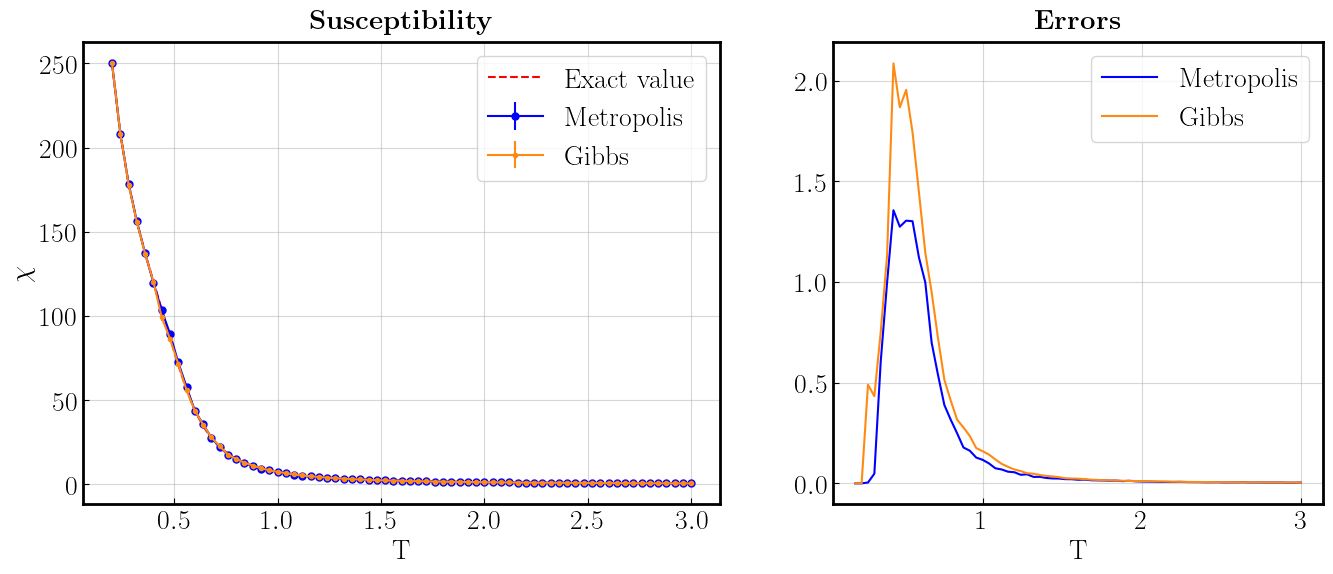

In [104]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H0_metro[:,5], yerr=data_H0_metro[:,6], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H0_gibbs[:,5], yerr=data_H0_gibbs[:,6], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, X, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Susceptibility}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('$\chi$')
axs[0].legend()

axs[1].plot(T, data_H0_metro[:,6], color='blue', label='Metropolis')
axs[1].plot(T, data_H0_gibbs[:,6], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

**Plot parameters**:
- Total steps: $10^5$
- Blocks: $100$
- Steps in each block: $10^3$

### Magnetization

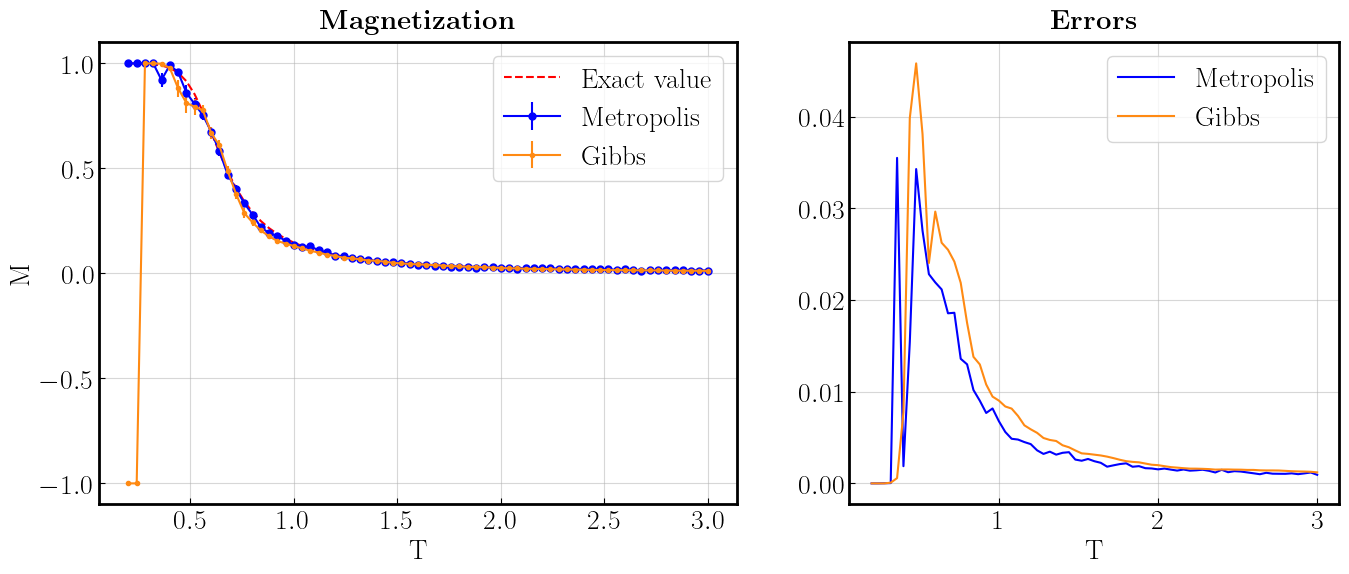

In [105]:
l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**N + l2**N
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(N-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(N-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

fig, axs = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios': [1.3, 1]})

axs[0].errorbar(T, data_H2_metro[:,3], yerr=data_H2_metro[:,4], marker='o', markersize=5, color='blue', label='Metropolis')
axs[0].errorbar(T, data_H2_gibbs[:,3], yerr=data_H2_gibbs[:,4], marker='o', markersize=3, color='#FF8A13', label='Gibbs')
axs[0].plot(T, M, color='red', linestyle='--', label='Exact value')

axs[0].set_title(r'\textbf{Magnetization}', pad=10)
axs[0].set_xlabel('T')
axs[0].set_ylabel('M')
axs[0].legend()

axs[1].plot(T, data_H2_metro[:,4], color='blue', label='Metropolis')
axs[1].plot(T, data_H2_gibbs[:,4], color='#FF8A13', label='Gibbs')

axs[1].set_title(r'\textbf{Errors}', pad=10)
axs[1].set_xlabel('T')
axs[1].legend()

plt.show()

**Plot parameters**:
- Total steps: $10^5$
- Blocks: $100$
- Steps in each block: $10^3$

## Observations

- The simulated quantities are generally in good agreement, within one $\sigma$, with the analytical solution of the model, exeptions made for the specific heat and magnetization at low temperatures. In general, at low temperature the simulation is worse than at high temperatures, because if $T$ is small, so will be the energy of the system, and thus it has less probability to explore all the phase space and to reach the correct equilibrium state.
- Comparing errors between the two sampling methods, it seems that $M(RT)^2$ performs better than Gibbs. 